<a href="https://colab.research.google.com/github/xp348/intelligent-information-systems/blob/main/%D0%A4%D0%B5%D0%B2%D1%80%D0%B0%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D1%83%D1%80%D1%81_2020_Light_Python_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_9_%D0%9E%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D1%81%D0%B8%D0%B3%D0%BD%D0%B0%D0%BB%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Библиотеки:

In [1]:
import matplotlib.pyplot as plt               #Для вывода графиков
from scipy.fftpack import fft, ifft          #Для расчета FFT
import numpy as np
from scipy import signal                      #Отсюда будем вытаскивать фильтры
import librosa                                #Для параметризации аудио
import librosa.display                        #Для отображения аудио сигналов
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
import IPython.display as ipd                 #Для проигрывания аудио
import scipy

%matplotlib inline

In [ ]:
A=1.0 # Амплитуда сигнала
f=10 # Частота сигнала Hz
phi=1 # Начальная фаза синусоиды "Радианы"
fs=50 # Частота семплирования Hz
t=0.1 # продолжительность сигнала (секунды)

**Light**

Задание 1:

Переписать функцию Sine , таким образом, чтобы на выходе получать сигнал косинуса вместо синуса (np.cos)


















In [ ]:
def Sine(A, f, phi, fs, t, N):
    T = t/fs         # Период семплирования
    n = np.arange(N) # Кол-во семплов
    x = A*np.sin(2*np.pi*f*n*T + phi)
    return x, n

In [ ]:
def Cosine(A, f, phi, fs, t, N):
    T = t/fs         # Период семплирования
    n = np.arange(N) # Кол-во семплов
    x = A*np.cos(2*np.pi*f*n*T + phi)
    return x, n

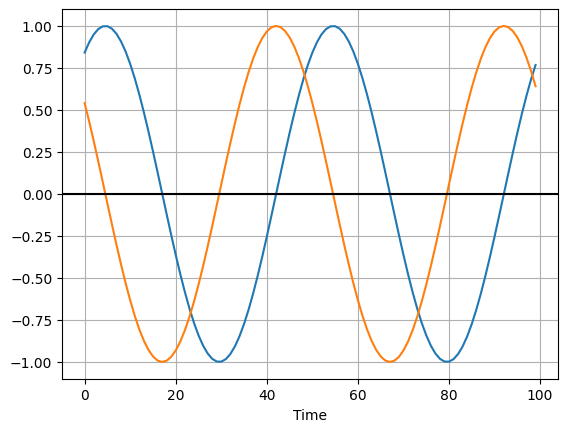

In [ ]:
plt.plot(Sine(A, f, phi, fs, t, 100)[0])
plt.plot(Cosine(A, f, phi, fs, t, 100)[0])
plt.xlabel('Time')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

Задание 2:

Модифицировать функцию Sine таким образом чтобы можно было взвращать составной сигнал - состоящий из комбинаций sin и cos, каждая отдельная гармоническая функция в составном сигнале должна принимать свои параметры:

A = Амплитуда сигнала

f = Частота сигнала Hz

phi = Начальная фаза синусоиды "Радианы"

Сделайте вариант с 2-мя и 3-мя гармоническими сигналами

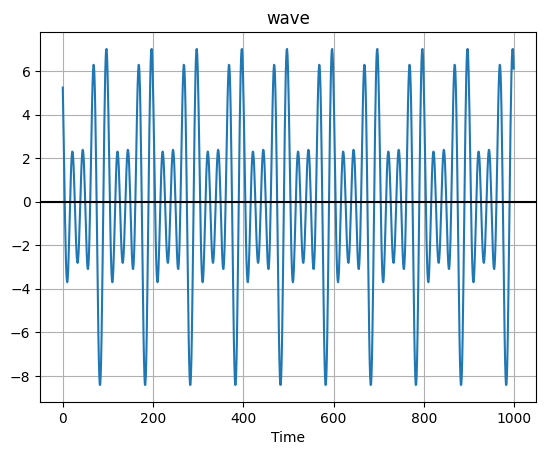

In [ ]:
# a1, a2 = 1.0, 2
# f1, f2 = 10.0, 15.0
# phi1, phi2 = 0, 1
# fs = 50.0
# t = 0.1

params=[{"a":1.0,"f":10.0,"phi":0}, {"a":2.0,"f":15.0,"phi":1}, {"a":3.0,"f":20.0,"phi":2}]
wave=[]
for item in params:
  res =Sine(item["a"],item["f"],item["phi"], fs, t, 1000)[0] +Cosine(item["a"],item["f"],item["phi"], fs, t, 1000)[0]
  wave.append( res)
plt.plot(sum(wave))
# wave1 = Sine(a1,f1,phi1, fs, t, 100)[0]
# wave2 = Sine(a2,f2,phi2, fs, t, 100)[0]
# plt.plot(wave1 + wave2)

plt.title('wave')
#Подпись оси
plt.xlabel('Time')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')

#Вывести график синуса
plt.show()

Задание 3:

Дан сигнал 3np.sin(2np.pi5.45*0.002 + 2.) Перепишите выражение таким образом, чтобы: а) амплитуда увеличилась в 2 раза б) Фаза сигнала была в 0.

 Амплитуда сигнала *np.cos(2*np.pi*Частота сигнала Hz*Кол-во семплов*(продолжительность сигнала/Частота семплирования Hz) + Начальная фаза синусоиды "Радианы")

ответ: 6np.sin(2*np.pi*5.45*0.002 + 0)

Задание 4:

Сигнал задан следующей функцией:
t = np.linspace(0, 1, n, endpoint=True)
np.sin(3*np.pi*t) + np.sin(5*np.pi*t)
Отобразить на графике Аналоговый, Дискретный и Квантованные сигналы

<ipython-input-40-2500b3725738>:11: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  return plt.stem(*args, **kwargs)  #Дискретный сигнал


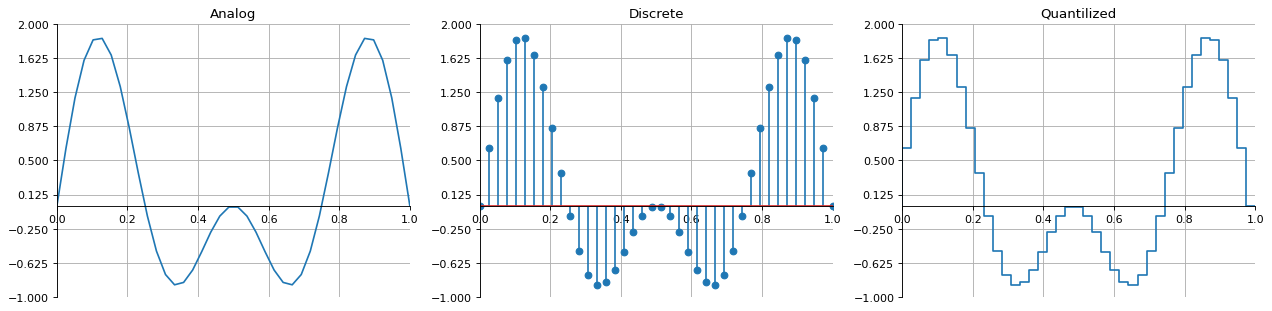

In [ ]:
n = 40
#Временной вектор
t = np.linspace(0, 1, n, endpoint=True)

x = np.sin(3*np.pi*t) + np.sin(5*np.pi*t)

def plt_sel(s, *args, **kwargs):
    if s == 0:
        return plt.plot(*args)            #Аналоговый сигнал
    if s == 1:
        return plt.stem(*args, **kwargs)  #Дискретный сигнал
    if s == 2:
        return plt.step(*args)            #Квантованный сигнал

t_titles = ['Analog', 'Discrete', 'Quantilized']

#Вывод графика
plt.figure(figsize=(16, 4), dpi=80)
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(t_titles[i])
    plt_sel(i, t, x, use_line_collection=True)
    plt.xlim([0, 1])
    plt.yticks(np.linspace(np.floor(np.min(x)), np.ceil(np.max(x)), 9)) #Для подписи Оy генерируем набор значений с нижней (floor)
    plt.grid(True)                                                      #Верхней границей

    #Задаем тип отображения (оси)
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('data',0))

#Подстраиваем наши subplot под размеры plt.figure
plt.tight_layout()

Задание 5:

Загрузите любой аудио сигнал и сделайте его Фурье преобразование. Выведите на графике амплитудный спектр.

In [11]:
audio_patch = './Velada (1).wav'
ipd.Audio(audio_patch)
x, sr = librosa.load(audio_patch)



ValueError: ignored

Задача 6:

Найдите модуль и аргумент спектра для следующего сигнала гармонического сигнала: синус (np.sin) С Частотой 20Гц Амплитудой 3 И фазой 1

In [ ]:
f = 20  # частота сигнала
A = 3  # амплитуда сигнала
phi = 1  # фаза сигнала

t = np.arange(0, 1, 1/100)

x = A * np.sin(2 * np.pi * f * t + phi)

X = np.fft.fft(x)

absX = np.abs(X)
argX = np.angle(X)
print("Модуль спектра:", absX)
print("Аргумент спектра:", argX)

Модуль спектра: [1.77635684e-15 7.37156098e-14 4.81295019e-15 1.44867193e-13
 1.51813290e-13 1.49889154e-13 5.23509762e-14 4.96888029e-14
 4.02021003e-14 3.89236971e-14 5.12356758e-14 1.58425807e-13
 2.73673869e-13 1.65816964e-13 4.57032480e-14 5.69320474e-14
 8.13396818e-15 4.57489903e-14 3.92750442e-14 7.52799796e-14
 1.50000000e+02 4.91874045e-14 1.30742795e-13 1.45639546e-13
 5.07373297e-15 4.97697021e-14 1.33122973e-14 1.26823304e-13
 1.37048679e-13 1.71654365e-13 3.17764372e-14 1.11739164e-13
 2.03703669e-14 8.61193791e-14 1.30228727e-14 1.12286187e-13
 9.08036276e-14 9.11238072e-14 1.65005313e-13 1.60940257e-13
 2.80416976e-14 2.76828087e-14 1.07276647e-14 3.65373235e-14
 8.11342310e-14 5.72857868e-14 1.04589136e-13 3.03954377e-14
 8.86828327e-14 4.06743206e-14 4.44089210e-14 4.06743206e-14
 8.86828327e-14 3.03954377e-14 1.04589136e-13 5.72857868e-14
 8.11342310e-14 3.65373235e-14 1.07276647e-14 2.76828087e-14
 2.80416976e-14 1.60940257e-13 1.65005313e-13 9.11238072e-14
 9.08036

**PRO**


Задача 1:

Найдите модуль спектра для следующего сигнала [5,3,0,0,0,-1,3, 3, 5, 0].


In [ ]:
x = [5, 3, 0, 0, 0, -1, 3, 3, 5, 0]

X = np.fft.fft(x)
absX = np.abs(X)

print("Модуль спектра:", absX)

Модуль спектра: [18.         10.08399314  4.57272676  6.42752536  5.66481862  8.
  5.66481862  6.42752536  4.57272676 10.08399314]


Задача 2:

Дан сложный сигнал состаящий из 4-х гармонических компонент (синус) с различными значениями амплитуд и частот. Выведите спектр сигнала, на основе спектра определите частоты и амплитуды гармонических составляющих

<ipython-input-3-84bb443e7419>:20: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(x, use_line_collection=True, basefmt='C0') #use_line_collection=True - способ хранения линий (для оптимизации памяти)
<ipython-input-3-84bb443e7419>:28: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(X, use_line_collection=True, basefmt='C0') #use_line_collection=True - способ хранения линий (для оптимизации памяти)


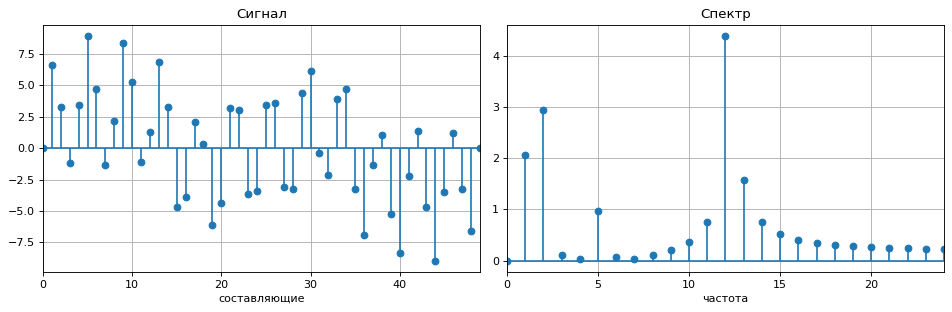

In [3]:


x =  [ 0.00000000e+00, 6.61225969e+00, 3.25848078e+00, -1.20084548e+00, 3.45301249e+00, 8.94406332e+00,
      4.69738850e+00, -1.36112077e+00, 2.18739790e+00, 8.35228095e+00, 5.25735866e+00, -1.07697134e+00,
      1.30202985e+00, 6.87594476e+00, 3.25150704e+00, -4.69190350e+00, -3.88118391e+00, 2.10527395e+00,
      3.66950398e-01, -6.14121684e+00, -4.38906614e+00, 3.21326193e+00, 3.07651304e+00, -3.62470149e+00,
      -3.41879558e+00, 3.41879558e+00, 3.62470149e+00, -3.07651304e+00, -3.21326193e+00, 4.38906614e+00,
      6.14121684e+00, -3.66950398e-01, -2.10527395e+00, 3.88118391e+00, 4.69190350e+00, -3.25150704e+00,
      -6.87594476e+00, -1.30202985e+00, 1.07697134e+00, -5.25735866e+00, -8.35228095e+00, -2.18739790e+00,
      1.36112077e+00, -4.69738850e+00, -8.94406332e+00, -3.45301249e+00, 1.20084548e+00, -3.25848078e+00,
      -6.61225969e+00, -1.78798433e-14]

X = fft(x)
X = 2*np.abs(X) /len(x) #Выводим амплитудную характеристику, нормализуем по N

#Выводим результаты
fig = plt.figure(figsize=(12, 4), dpi=80)

#Сигнал
plt.subplot(1, 2, 1)
plt.title('Сигнал')
plt.stem(x, use_line_collection=True, basefmt='C0') #use_line_collection=True - способ хранения линий (для оптимизации памяти)
plt.xlim([0, N-1])
plt.xlabel('составляющие')
plt.grid()

#Амплитудный спектр
plt.subplot(1, 2, 2)
plt.title('Спектр')
plt.stem(X, use_line_collection=True, basefmt='C0') #use_line_collection=True - способ хранения линий (для оптимизации памяти)
plt.xlim([0, N//2-1])
plt.xlabel('частота')
plt.grid()
plt.tight_layout()

Задача 3:

Самостоятельно ознакомившись с тем что такое Автокорреляционная функция рассчитать и отобразить графически Автокорреляционную функцию прямоугольного импульса: [np.zeros(8), np.ones(3), np.zeros(8)] , Напишите функцию вычисляющую автокорреляцию.

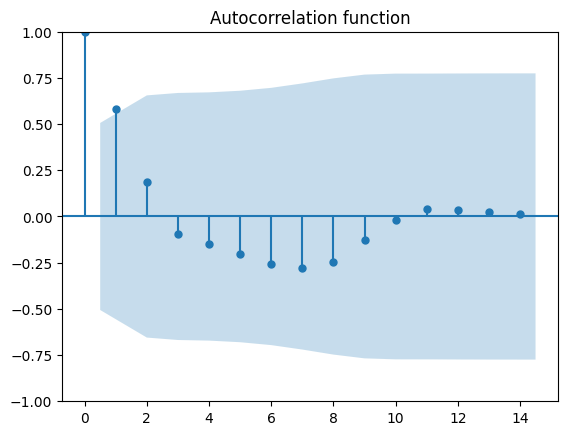

In [28]:
def autocorr(data, lags):

  acorr = len(lags) * [0] # создание массива для будущих корреляционных элементов
  mean = sum(data) / len(data) # Среднее
  var = sum([(x - mean)**2 for x in data]) / len(data) #Дисперсия (Или же отклонение от ожидаемой величины)
  ndata = [x - mean for x in data] #Нормализация

  for l in lags:
      c = 1

      if (l > 0):
          tmp = [ndata[l:][i] * ndata[:-l][i]
                for i in range(len(data) - l)]

          c = sum(tmp) / len(data) / var

      acorr[l] = c

  return acorr
data = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
lags = range(15)
ac = autocorr(data, lags)
fig = tsaplots.plot_acf(ac, lags = range(15),  title='Autocorrelation function' )
plt.show()

Задача 4:

Попробуйте подобрать другой тип сигнала (например, ЭКГ, временной ряд и т.д.) и сделать его преобразование Фурье. Выведите его спектрограмму и полученный после преобразования амплитудный спектр



# Теория

`Сигнал` – изменение физической величины, несущее информацию,
кодированную определенным способом, либо синхронизированное
(заранее оговоренное с получателем) отсутствие изменения
физической величины.

`Амплитуда` – это максимальное отклонение напряжения сигнала
от нулевого порога в область положительных или отрицательных
значений.

`Фаза` показывает, из какого первоначального значения начинает
изменяться синусоида. Фаза измеряется в градусах или радианах.

`Частота` – это количество колебаний сигнала в единицу времени. Для
стандартизации в качестве единицы времени используется 1 секунда.
Единицей измерения частоты служит Герц (Гц).

`Аналоговые сигналы` – это сигналы, непрерывные во времени, они
определены во все моменты времени.

`Дискретные сигналы` – это сигналы, представленные
последовательностью отсчетов, т. е. значениями сигналов в

дискретные моменты времени.

`Цифровые сигналы` – это сигналы, дискретные во времени (или в
пространстве) и квантованные по уровню. Вычислительные процедуры
в компьютере выполняются именно в цифровых сигналах.

`Спектр сигнала` – результат разложения сигнала на более простые
гармонические функции (синус/косинус), для разложения обычно
применяется преобразование Фурье.

`Спектрограмма` – изображение, показывающее зависимость
спектральной плотности мощности сигнала от времени.

`Амплитудный спектр сигнала` – амплитуды всех гармоник, из которых
складывается негармонический сигнал.

`Преобразование Фурье` (обозначается F) – математическая операция,
сопоставляющая одной функции вещественной переменной другую
функцию вещественной переменной. Эта функция описывает
коэффициенты («амплитуды») при разложении исходной функции на
гармонические составляющие с разными частотами.

Преобразование Фурье характеризует «форму» сигнала.

График аргумента комплексного числа называется «фазовым
спектром».

График модуля комплексного числа – «амплитудным спектром».

`Теорема Котельникова`: аналоговый сигнал может быть восстановлен
однозначно и без потерь, взятым с частотой, строго большей
удвоенной максимальной частоты аналогового сигнала.